# Установка библиотеки

In [1]:
!pip install manuscript-ocr==0.1.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.

Downloading...
From: https://github.com/konstantinkozhin/manuscript-ocr/releases/download/v0.1.0/east_quad_14_05.pth
To: /root/.east_weights.pth
100%|██████████| 121M/121M [00:10<00:00, 11.9MB/s]


Loaded pretrained model from /root/.east_weights.pth
Результаты детекции: blocks=[Block(words=[Word(polygon=[(864.0, 696.0), (954.0, 696.0), (952.0, 733.0), (864.0, 732.0)], score=0.9999620914459229), Word(polygon=[(676.0, 817.0), (763.0, 817.0), (763.0, 860.0), (677.0, 860.0)], score=0.9999577403068542), Word(polygon=[(277.0, 733.0), (330.0, 733.0), (330.0, 772.0), (277.0, 772.0)], score=0.9999491572380066), Word(polygon=[(662.0, 349.0), (771.0, 349.0), (771.0, 392.0), (662.0, 392.0)], score=0.9999091625213623), Word(polygon=[(869.0, 509.0), (896.0, 509.0), (896.0, 526.0), (869.0, 526.0)], score=0.9999088048934937), Word(polygon=[(764.0, 810.0), (858.0, 810.0), (858.0, 840.0), (764.0, 840.0)], score=0.9998977184295654), Word(polygon=[(296.0, 432.0), (385.0, 433.0), (385.0, 464.0), (296.0, 466.0)], score=0.999893069267273), Word(polygon=[(778.0, 231.0), (854.0, 231.0), (854.0, 266.0), (778.0, 266.0)], score=0.9998925924301147), Word(polygon=[(203.0, 326.0), (289.0, 326.0), (289.0, 356.

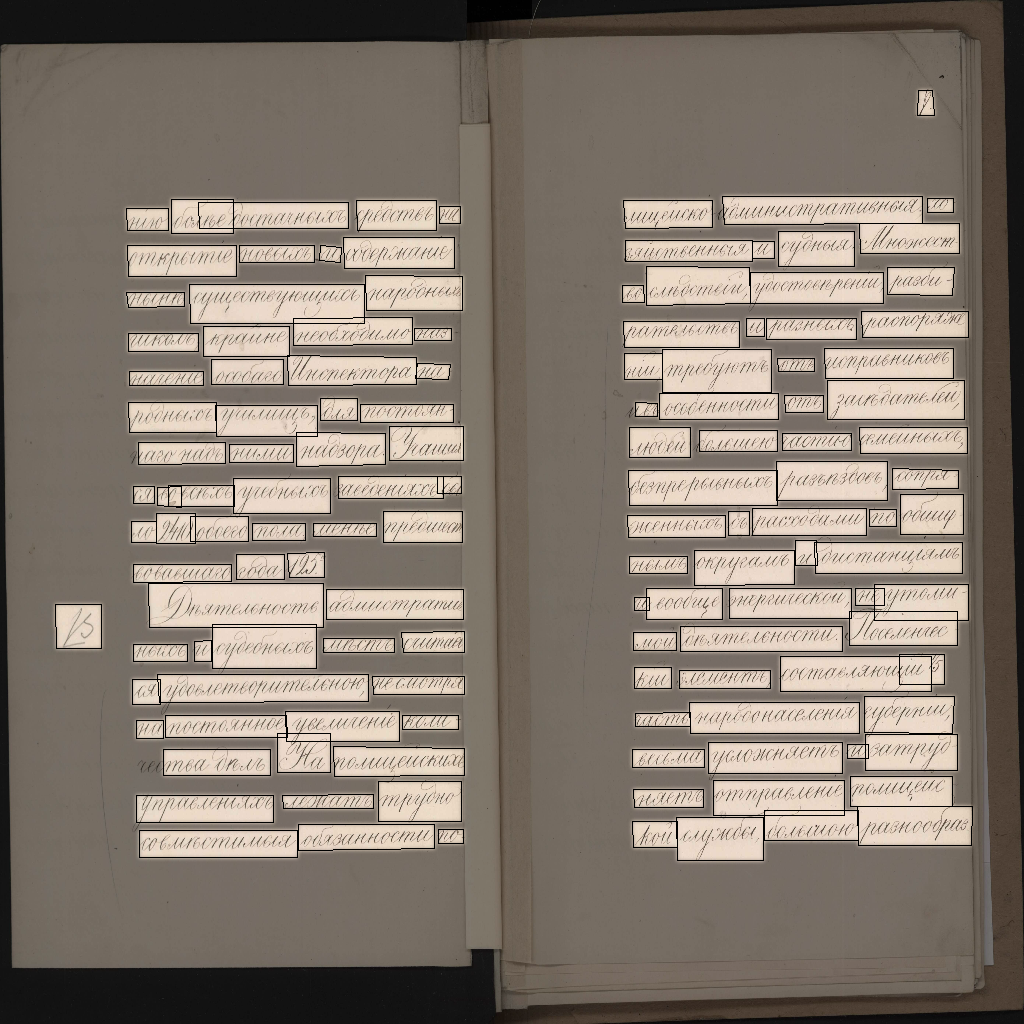

In [ ]:
from PIL import Image
import requests, io
from IPython.display import display

from manuscript.detectors import EASTInfer

# 2. Пример изображения с Яндекс.Диска
share_link = "https://disk.yandex.ru/i/wa-tnK_Xdst0Pg"

# 3. Запрос прямой ссылки через API Яндекса
api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
download_url = requests.get(api_url, params={"public_key": share_link}).json()["href"]

# 4. Скачиваем изображение в память
resp = requests.get(download_url)
img = Image.open(io.BytesIO(resp.content)).convert("RGB")

# 5. Сохраняем временно на диск, если infer принимает только путь
temp_path = "/content/temp.jpg"
img.save(temp_path)

# 6. Инициализация детектора и инференс
det = EASTInfer(score_thresh=0.9)
page, result_img = det.predict(temp_path, vis=True)

# 7. Печатаем координаты и отображаем результат
print("Результаты детекции:", page)
display(Image.fromarray(result_img))